In [5]:
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.integrate import odeint
import scipy.odr
import scipy
import statistics as st
import math
from matplotlib.pylab import *
from tabulate import tabulate

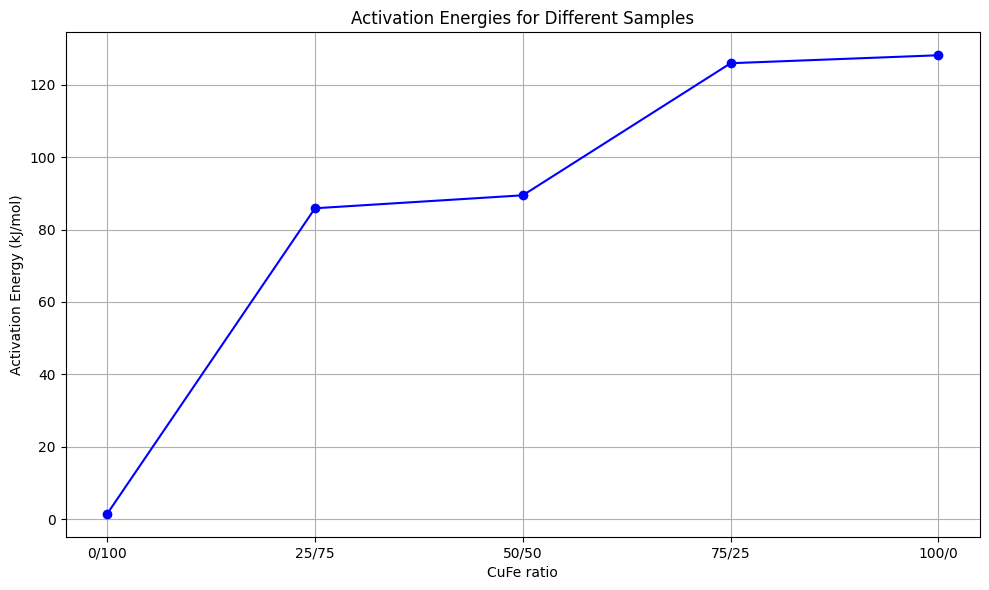

In [6]:
#Ea_list = [54.0298, 115.448, 95.2161, 106.983, 148.93]

b_0_100 = [1.080e-07, 1.455e+00, 1.075e-01]
b_25_75 = [4.423e+00, 8.591e+01, -7.909e-04]
b_50_50 = [ 9.960e+00,  8.949e+01, -4.601e-03]
b_75_25 = [ 4.026e+04 , 1.260e+02, -3.387e-02]
b_100_0 = [ 5.327e+04,  1.282e+02, -3.847e-02]


A_list = [b_0_100[0], b_25_75[0], b_50_50[0],  b_75_25[0], b_100_0[0]] 
Ea_list = [b_0_100[1],b_25_75[1],b_50_50[1], b_75_25[1],b_100_0[1]] 
kd_list= [b_0_100[2],b_25_75[2],b_50_50[2], b_75_25[2],b_100_0[2]] 
sample_names=['0/100', '25/75', '50/50', '75/25', '100/0']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(sample_names, Ea_list, marker='o', linestyle='-', color='blue')

ax.set_xlabel('CuFe ratio')
ax.set_ylabel('Activation Energy (kJ/mol)')
ax.set_title('Activation Energies for Different Samples')
ax.grid(True)

plt.tight_layout()
plt.show()



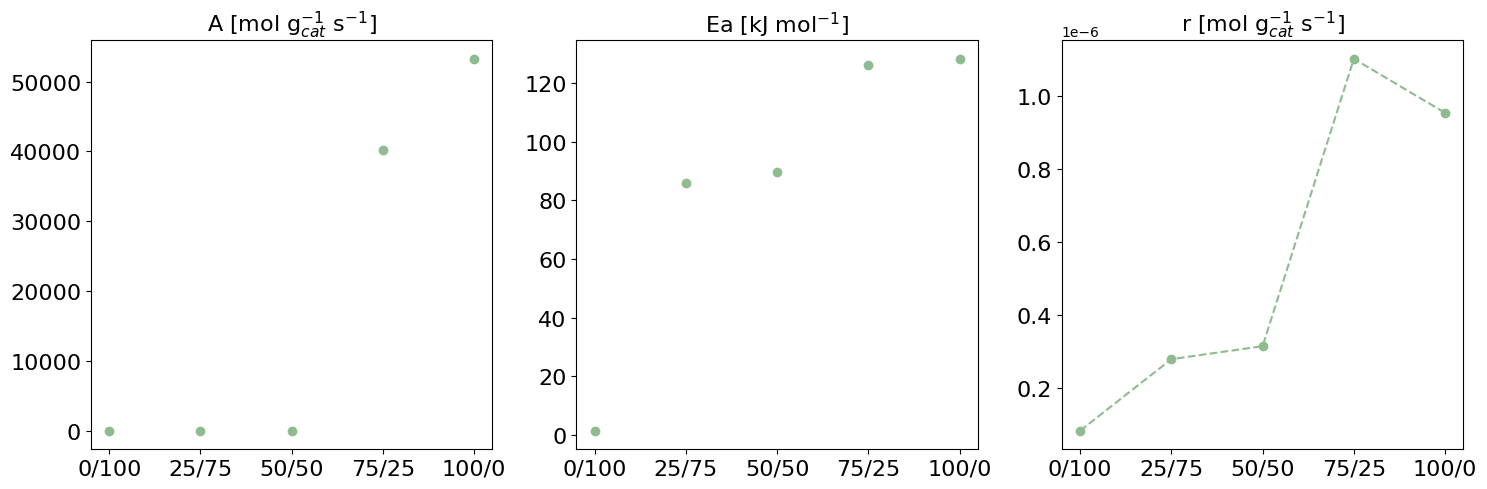

In [7]:
R = 8.314  # Gas constant, in J/(mol*K)
T = 623.15    # Temperature, in Kelvin

r_list = []
for i in range(len(A_list)):
    r_value_Ni = A_list[i] * np.exp(-Ea_list[i] *1000/ (R * T))
    r_list.append(r_value_Ni)


title_fontsize = 16
label_fontsize = 16
tick_fontsize = 16

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

colors = ['#f5cfb6', '#f5c0b6', '#f99d9d', '#f57979', '#f7be99']
colors = ['darkorange','tomato','darkseagreen','darkblue', 'steelblue','mediumvioletred']

ax1.plot(sample_names, A_list, marker='o', linestyle='None', color='darkseagreen')
ax1.set_title("A [mol g$_{cat}^{-1}$ s$^{-1}$]", fontsize=title_fontsize)
ax1.tick_params(axis='both', which='major', labelsize=tick_fontsize)

ax2.plot(sample_names, Ea_list, marker='o', linestyle='None', color='darkseagreen')
ax2.set_title("Ea [kJ mol$^{-1}$]", fontsize=title_fontsize)
ax2.tick_params(axis='both', which='major', labelsize=tick_fontsize)

ax3.plot(sample_names, r_list, marker='o', linestyle='--', color='darkseagreen')
ax3.set_title("r [mol g$_{cat}^{-1}$ s$^{-1}$]", fontsize=title_fontsize)
ax3.tick_params(axis='both', which='major', labelsize=tick_fontsize)

plt.tight_layout()
plt.show()


In [9]:
kb = 1.380649 * 10**(-23) # J/K
h = 6.62607015 * 10**(-34) # Js
T = [573.15, 583.15, 593.15, 603.15, 613.15, 623.15] #K
R=8.314 # J/mol

deltaG_list=[]
for i in range(len(A_list)):
    deltaG_sublist = []
    for y in range(len(T)):
        deltaG = (R * T[y] * (-np.log(A_list[i]) + np.log(kb * T[y] / h) + Ea_list[i]))
        deltaG_sublist.append(deltaG)
    deltaG_list.append(deltaG_sublist)

#print(deltaG_list)

print("Temperature(K)\t", end="")  

for name in sample_names:
    print(f"{name}\t", end="\t")  
print()  


for i, temp in enumerate(T):
    print(f"{temp}\t\t", end="")  
    for j in range(len(A_list)):
        print(f"{deltaG_list[j][i]:.2f}", end="\t")  
    print()  


Temperature(K)	0/100		25/75		50/50		75/25		100/0		
573.15		226856.64	545775.34	558966.48	693370.28	702519.33	
583.15		230898.57	555381.58	568802.87	705551.68	714860.36	
593.15		234941.93	564989.25	578640.69	717734.50	727202.81	
603.15		238986.68	574598.32	588479.92	729918.73	739546.66	
613.15		243032.82	584208.77	598320.52	742104.33	751891.89	
623.15		247080.31	593820.58	608162.47	754291.29	764238.48	


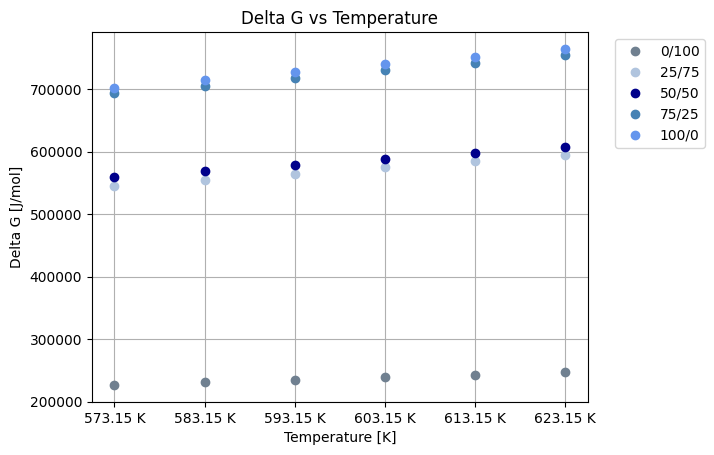

In [10]:

flat_deltaG_list = np.array(deltaG_list).flatten()
colors = ['slategrey', 'lightsteelblue', 'darkblue','steelblue', 'cornflowerblue','black']

for i, sublist in enumerate(deltaG_list):
    plt.plot(T, sublist, marker='o', linestyle='None', color=colors[i], label=sample_names[i])


plt.xlabel('Temperature [K]')
plt.ylabel('Delta G [J/mol]') # BENEVNING MÅ SJEKKES
plt.title('Delta G vs Temperature')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(T, [f'{temp} K' for temp in T])
plt.grid(True)
plt.show()


In [11]:
T1=573.15
T2=583.15
T3=593.15
T4=603.15
T5=613.15
T6=623.15

r_list1 = []
for i in range(len(A_list)):
    r_value = A_list[i] * np.exp(-Ea_list[i] *1000/ (R * T1))
    r_list1.append(r_value)

r_list2 = []
for i in range(len(A_list)):
    r_value = A_list[i] * np.exp(-Ea_list[i] *1000/ (R * T2))
    r_list2.append(r_value)

r_list3 = []
for i in range(len(A_list)):
    r_value = A_list[i] * np.exp(-Ea_list[i] *1000/ (R * T3))
    r_list3.append(r_value)

r_list4 = []
for i in range(len(A_list)):
    r_value = A_list[i] * np.exp(-Ea_list[i] *1000/ (R * T4))
    r_list4.append(r_value)

r_list5 = []
for i in range(len(A_list)):
    r_value = A_list[i] * np.exp(-Ea_list[i] *1000/ (R * T5))
    r_list5.append(r_value)

r_list6 = []
for i in range(len(A_list)):
    r_value = A_list[i] * np.exp(-Ea_list[i] *1000/ (R * T6))
    r_list6.append(r_value)

print("r_list_300: ", r_list1)
print("r_list_310: ", r_list2)
print("r_list_320: ", r_list3)
print("r_list_330: ", r_list4)
print("r_list_340: ", r_list5)
print("r_list_350: ", r_list6)

r_list_300:  [7.958220730320431e-08, 6.54536943520611e-08, 6.9534068242407e-08, 1.3222509448032952e-07, 1.1025954883628107e-07]
r_list_310:  [7.999999713762093e-08, 8.916639529912357e-08, 9.595327376105165e-08, 2.080830968161867e-07, 1.748950284252843e-07]
r_list_320:  [8.040578331666113e-08, 1.2021011188168225e-07, 1.3098031846511258e-07, 3.224926466979336e-07, 2.7313847485848546e-07]
r_list_330:  [8.080007085726569e-08, 1.604644082803657e-07, 1.769583008660154e-07, 4.925986177966027e-07, 4.203088029125898e-07]
r_list_340:  [8.118333715739681e-08, 2.1218997088196977e-07, 2.3674114910966652e-07, 7.421054752092359e-07, 6.377469470037197e-07]
r_list_350:  [8.155603383334175e-08, 2.7808424418008736e-07, 3.1377595827157845e-07, 1.1033824115215704e-06, 9.548090591148275e-07]
